# <center>Laboratorium 5<br>Metody Numeryczne</center>

Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi (w postaci kodu) z komentarzami w środowisku Jupyter Notebook i umieścić je na platformie e-learningowej.

***Materiały przygotowujące:***


In [5]:
import main
import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt
import timeit

from scipy.interpolate import splrep, splev
from scipy.interpolate import barycentric_interpolate

%load_ext memory_profiler

def PolyCoefficients(x, coeffs):
    """ Returns a polynomial for ``x`` values for the ``coeffs`` provided.
    The coefficients must be in ascending order (``x**0`` to ``x**o``).
    """
    o = len(coeffs)
    y = 0
    for i in range(o):
        y += coeffs[i]*x**i
    return y

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


***Zadanie 1.***  
Zaimplementuj interpolacje pierwszego stopnia. Jako dane wejściowe dane są dwa wektory: argumentów oraz wartości funkcji. Funkcja ma zwracać współczynniki funkcji liniowych w poszczególnych przedziałach.

***Podpowiedź***

poszczególne współczynniki przyjmują wartość:

$ a_k=\frac{y_{k+1}-y_k}{x_{k+1}-x_k}$

$ b_k=y_k-a_k*x_k$

***Przykład***


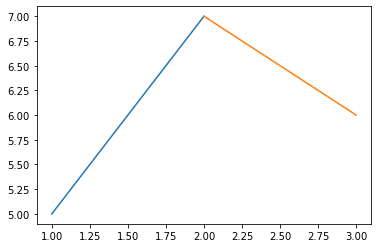

In [7]:
x=np.array([1,2,3])
y=np.array([5,7,6])

a,b=main.first_spline(x,y)
f = [[b[i],a[i]] for i in range(len(a))]

for i in range(len(x)-1):
    x_new = np.linspace(x[i], x[i+1],1000)
    plt.plot(x_new, PolyCoefficients(x_new, f[i]))

***Zadanie 2.***  
Korzystając z funkcji z pakietu [scipy.interpolate.splprep](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.splprep.html#scipy.interpolate.splprep), funkcji zaimplementowanej w Zadaniu 1 oraz interpolacji barycentrycznej z węzłami równoodległymi (korzystając z kodu z poprzedniego zadania) dokonaj interpolacji funkcji: 
    
### $ f(x) = \frac{1}{25x^2+1}$

W przedziale \[-1, 1\]

dla różnych ilości wartości węzłów: 5, 10, 15, 20, 50, 100, 1000

Dokonaj porównania wyników otrzymanych:  
Wykorzystując funkcję z ubiegłego tygodnia, ocenić jakość interpolacji funkcji spline pierwszego stopnia z wartościami danej funkcji.
Sprawdź czas wykonywania się poszczególnych elementów oraz ilość pamięci użytej 

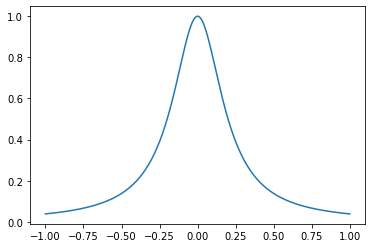

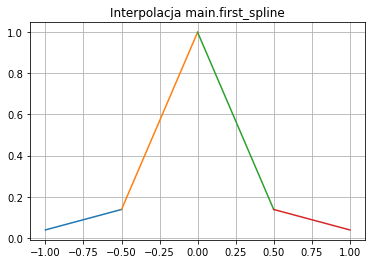

Jakość dla wykonanej interpolacji first spline:  0.1802303832770744 dla  5  węzłów
1.05 µs ± 521 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
peak memory: 92.61 MiB, increment: 0.17 MiB




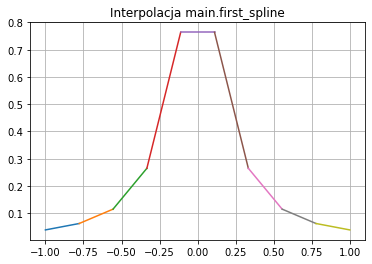

Jakość dla wykonanej interpolacji first spline:  0.235848747343683 dla  10  węzłów
756 ns ± 142 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
peak memory: 92.44 MiB, increment: 0.07 MiB




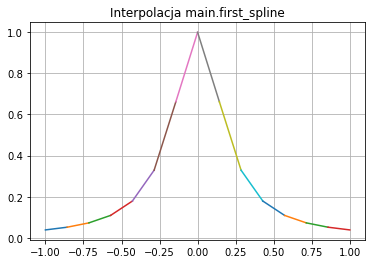

Jakość dla wykonanej interpolacji first spline:  0.05976193079799941 dla  15  węzłów
784 ns ± 138 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
peak memory: 92.49 MiB, increment: -0.04 MiB




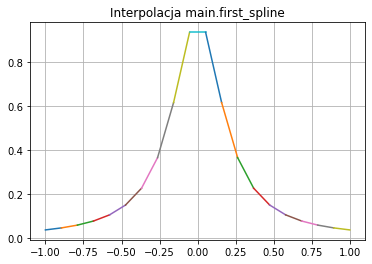

Jakość dla wykonanej interpolacji first spline:  0.06476676998745334 dla  20  węzłów
762 ns ± 129 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
peak memory: 92.43 MiB, increment: 0.02 MiB




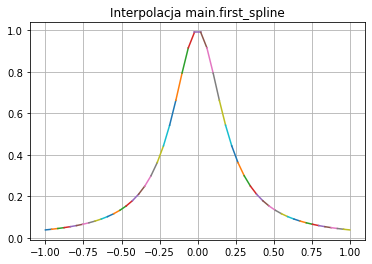

Jakość dla wykonanej interpolacji first spline:  0.010305018420896928 dla  50  węzłów
1.15 µs ± 216 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
peak memory: 93.33 MiB, increment: 0.09 MiB




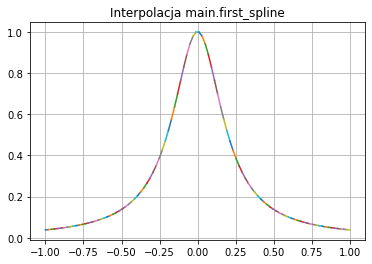

Jakość dla wykonanej interpolacji first spline:  0.0025442677474077913 dla  100  węzłów
2.98 µs ± 1 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
peak memory: 93.07 MiB, increment: 1.01 MiB




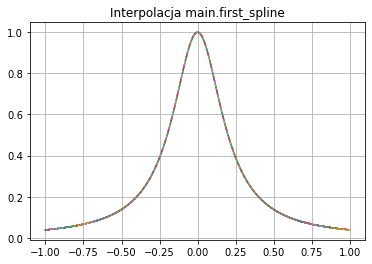

Jakość dla wykonanej interpolacji first spline:  2.5049422509582087e-05 dla  1000  węzłów
2.99 ms ± 1.29 ms per loop (mean ± std. dev. of 5 runs, 10 loops each)
peak memory: 104.55 MiB, increment: 0.00 MiB




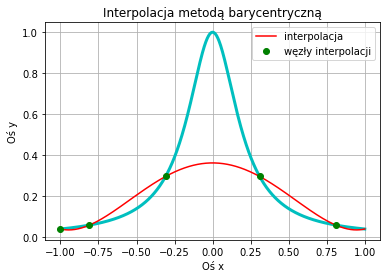

Jakość dla wykonanej interpolacji metodą barycentryczną:  0.6386170635191086 dla  5 wezłów
50 ns ± 11 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
peak memory: 104.44 MiB, increment: -0.02 MiB




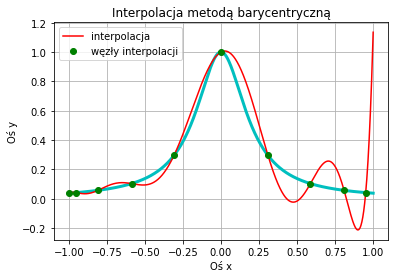

Jakość dla wykonanej interpolacji metodą barycentryczną:  1.0962671310665186 dla  10 wezłów
90 ns ± 6.32 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
peak memory: 104.50 MiB, increment: 0.15 MiB




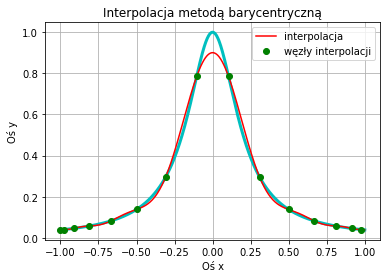

Jakość dla wykonanej interpolacji metodą barycentryczną:  0.0993081246377604 dla  15 wezłów
48 ns ± 11.7 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
peak memory: 104.54 MiB, increment: 0.07 MiB




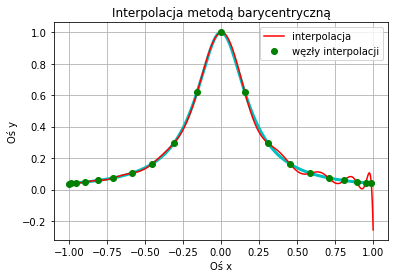

Jakość dla wykonanej interpolacji metodą barycentryczną:  0.2950913614340114 dla  20 wezłów
46 ns ± 12 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
peak memory: 104.30 MiB, increment: 0.01 MiB




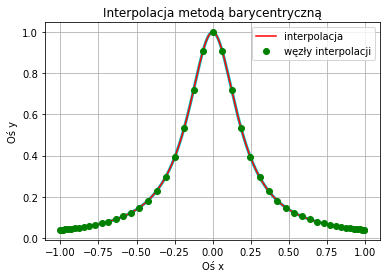

Jakość dla wykonanej interpolacji metodą barycentryczną:  0.0019012638731243092 dla  50 wezłów
48 ns ± 21.4 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
peak memory: 104.21 MiB, increment: 0.14 MiB




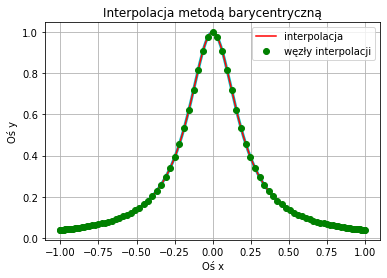

Jakość dla wykonanej interpolacji metodą barycentryczną:  1.8431957059944493e-07 dla  100 wezłów
78 ns ± 17.2 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
peak memory: 104.22 MiB, increment: 0.01 MiB




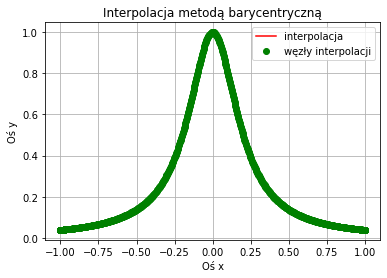

Jakość dla wykonanej interpolacji metodą barycentryczną:  0.0 dla  1000 wezłów
48 ns ± 11.7 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
peak memory: 104.93 MiB, increment: 0.00 MiB




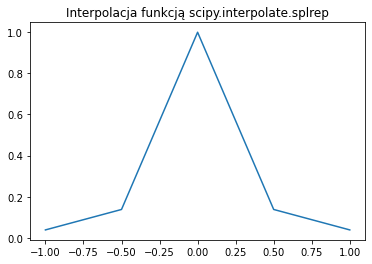

Jakość dla wykonanej interpolacji scipy.interpolate.splrep:  0.31708059737426797 dla  5 wezłów
90 ns ± 11 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
peak memory: 105.99 MiB, increment: -0.27 MiB




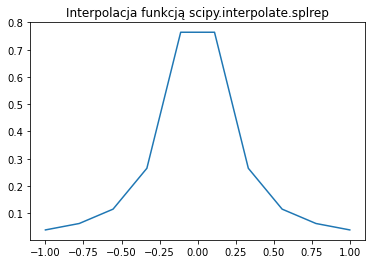

Jakość dla wykonanej interpolacji scipy.interpolate.splrep:  0.1429039208434163 dla  10 wezłów
58 ns ± 16 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
peak memory: 104.30 MiB, increment: 0.17 MiB




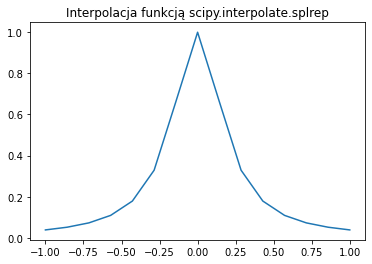

Jakość dla wykonanej interpolacji scipy.interpolate.splrep:  0.0024830029434582124 dla  15 wezłów
52 ns ± 9.8 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
peak memory: 104.45 MiB, increment: 0.17 MiB




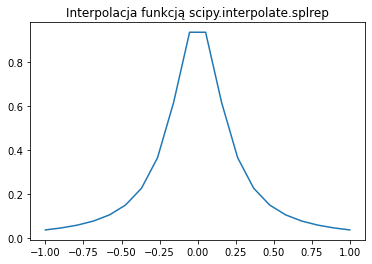

Jakość dla wykonanej interpolacji scipy.interpolate.splrep:  0.012329494431740362 dla  20 wezłów
50 ns ± 11 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
peak memory: 104.53 MiB, increment: 0.12 MiB




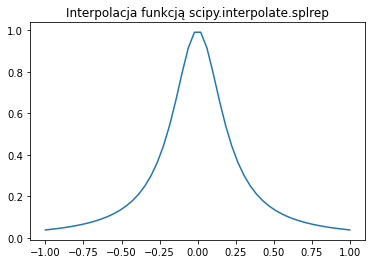

Jakość dla wykonanej interpolacji scipy.interpolate.splrep:  0.00014783017196251524 dla  50 wezłów
120 ns ± 11 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
peak memory: 105.97 MiB, increment: 0.04 MiB




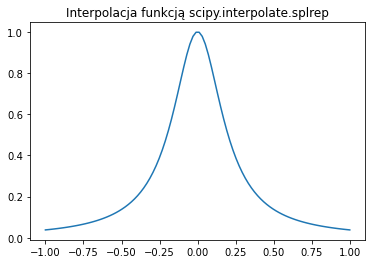

Jakość dla wykonanej interpolacji scipy.interpolate.splrep:  6.896291735003501e-06 dla  100 wezłów
86 ns ± 23.3 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
peak memory: 104.30 MiB, increment: 0.17 MiB




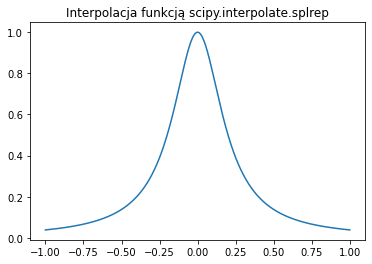

Jakość dla wykonanej interpolacji scipy.interpolate.splrep:  4.440892098500626e-16 dla  1000 wezłów
50 ns ± 15.5 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
peak memory: 104.46 MiB, increment: 0.18 MiB




In [8]:
# Funkcja
f = lambda x: 1 / ((25 * (x ** 2)) + 1)
x = np.linspace(-1, 1, 1000)
knots = [5, 10, 15, 20, 50, 100, 1000]


# Wykres funkcji
plt.plot(x, f(x))
plt.show()

# Dla napisanej funkcji main.first_spline
for elem in knots:
    x1 = np.linspace(-1, 1, elem)
    value = []
    
    for i in x1:
        r = f(i)
        value.append(r)
        
    value_list = np.array(value)
    a, b = main.first_spline(x1, value_list)
    z = [[b[i], a[i]] for i in range(len(a))]
    error = []
    

    for i in range(len(x1) - 1):
        x_new = np.linspace(x1[i], x1[i+1], 1000)
        inte = PolyCoefficients(x_new, z[i])
        error.append(main.L_inf(f(x_new), inte))
        plt.plot(x_new, PolyCoefficients(x_new, z[i]))
        
    plt.title("Interpolacja main.first_spline")
    plt.grid()
    plt.show()
    
    print("Jakość dla wykonanej interpolacji first spline: ", np.max(error), "dla ", elem, " węzłów")
    %timeit -r 5 -n 10 -o main.first_spline(x, value_list)
    %memit main.first_spline(x, value_list)
    print("\n")
    
for elem in knots:
    # Węzły Czebyszewa 
    xch = np.cos(np.linspace(1, elem, elem) * np.pi / elem)
    x_spline = np.linspace(-1, 1, elem)  
        
    # Wykres interpoalcji metodą barycentryczną
    yimp = barycentric_interpolate(xch, f(xch), x)
    plt.plot(x, f(x), 'c',  linewidth=3 )
    plt.plot(x, yimp, 'r',label = 'interpolacja')
    plt.plot(xch, f(xch), 'go',label = 'węzły interpolacji')
    plt.xlabel("Oś x")
    plt.ylabel("Oś y")
    plt.legend(loc = 0)
    plt.title("Interpolacja metodą barycentryczną")
    plt.grid()
    plt.show()
    
    print("Jakość dla wykonanej interpolacji metodą barycentryczną: ", main.L_inf(f(x), yimp), "dla ", elem, "wezłów")
    %timeit -r 5 -n 10 -o yimp
    %memit yimp
    print("\n")
    
for elem in knots:
    x_spline = np.linspace(-1, 1, elem)  

    # Interpolacja funkcją scipy.interpolate.splrep
    y = f(x_spline)
    tck = splrep(x_spline, y)
    plt.plot(x_spline, splev(x_spline, tck))
    plt.title("Interpolacja funkcją scipy.interpolate.splrep")
    plt.show()
    
    print("Jakość dla wykonanej interpolacji scipy.interpolate.splrep: ", main.L_inf(f(x), splev(x, tck)), "dla ", elem, "wezłów")
    %timeit -r 5 -n 10 -o tck
    %memit tck
    print("\n")

Sytuacja z poprzedniego laboratorium powtarza się. Metoda barycentryczna jest niewystarczjąca.

***Zadanie 3.***  
Korzystając z funkcji z pakietu [scipy.interpolate.splprep](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.splprep.html#scipy.interpolate.splprep), funkcji zaimplementowanej w Zadaniu 1 oraz interpolacji barycentrycznej z węzłami równoodległymi (korzystając z kodu z poprzedniego zadania) dokonaj interpolacji funkcji: 
    
### $ f(x) = cos(x)x^4$

W przedziale \[-1, 1\]

dla różnych ilości wartości węzłów: 5, 10, 15, 20, 50, 100, 1000

Dokonaj porównania wyników otrzymanych:  
Wykorzystując funkcję z ubiegłego tygodnia, ocenić jakość interpolacji funkcji spline pierwszego stopnia z wartościami danej funkcji.
Sprawdź czas wykonywania się poszczególnych elementów oraz ilość pamięci użytej 

In [2]:
# Funkcja
f = lambda x: np.cos(x) * (x ** 4)
x = np.linspace(-1, 1, 1000)
knots = [5, 10, 15, 20, 50, 100, 1000]


# Wykres funkcji
plt.plot(x, f(x))
plt.show()

# Dla napisanej funkcji main.first_spline
for elem in knots:
    x1 = np.linspace(-1, 1, elem)
    value = []
    
    for i in x1:
        r = f(i)
        value.append(r)
         
    value_list = np.array(value)
    a, b = main.first_spline(x1, value_list)
    z = [[b[i], a[i]] for i in range(len(a))]
    error = []
    

    for i in range(len(x1) - 1):
        x_new = np.linspace(x1[i], x1[i+1], 1000)
        inte = PolyCoefficients(x_new, z[i])
        error.append(main.L_inf(f(x_new), inte))
        plt.plot(x_new, PolyCoefficients(x_new, z[i]))
        
    plt.title("Interpolacja main.first_spline")
    plt.grid()
    plt.show()
    
    print("Jakość dla wykonanej interpolacji first spline: ", np.max(error), "dla ", elem, " węzłów")
    %timeit -r 5 -n 10 -o main.first_spline(x, value_list)
    %memit main.first_spline(x, value_list)
    print("\n")
    
for elem in knots:
    # Węzły Czebyszewa 
    xch = np.cos(np.linspace(1, elem, elem) * np.pi / elem)
    x_spline = np.linspace(-1, 1, elem)  
        
    # Wykres interpoalcji metodą barycentryczną
    yimp = barycentric_interpolate(xch, f(xch), x)
    plt.plot(x, f(x), 'b',  linewidth=3 )
    plt.plot(x, yimp, 'r',label = 'interpolacja')
    plt.plot(xch, f(xch), 'go',label = 'węzły interpolacji')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend(loc = 0)
    plt.title("Interpolacja metodą barycentryczną")
    plt.grid()
    plt.show()
    
    print("Jakość dla wykonanej interpolacji metodą barycentryczną: ", main.L_inf(f(x), yimp), "dla ", elem, "wezłów")
    %timeit -r 5 -n 10 -o yimp
    %memit yimp
    print("\n")
    
for elem in knots:
    x_spline = np.linspace(-1, 1, elem)  

    # Interpolacja funkcją scipy.interpolate.splrep
    y = f(x_spline)
    tck = splrep(x_spline, y)
    plt.plot(x_spline, splev(x_spline, tck))
    plt.title("Interpolacja funkcją scipy.interpolate.splrep")
    plt.show()
    
    print("Jakość dla wykonanej interpolacji scipy.interpolate.splrep: ", main.L_inf(f(x), splev(x, tck)), "dla ", elem, "wezłów")
    %timeit -r 5 -n 10 -o tck
    %memit tck
    print("\n")

NameError: name 'np' is not defined

Znowu, powtórka z zadania wyżej. Metoda barycentryczna jest niewystarczająca.

***Zadanie 4.***  
Zaimplementuj funkcję interpolującą sklejaną trzeciego rzędu (splajn kubiczny). Jako dane wejściowe dane są dwa wektory: argumentów oraz wartości funkcji. Funkcja ma zwracać współczynniki funkcji wielomianowych w poszczególnych przedziałach.

***Podpowiedź***

wprowadzimy następujące zmienne:

$b_0 = y_k$

$b_1 = d_k - \frac{h_k}{6}(2m_k+m_{k+1})$

$b_2 = \frac{m_k}{2}$

$b_3 = \frac{m_{k+1}-m_k}{6h_k}$

gdzie:

$h_k = x_{k+1} - x_k$

$d_k = y_{k+1} - y_k$

$m_k = 3\frac{d_k-d_{k-1}}{h_{k-1}+h_k} - \frac{m_{k-1}*\rho_k}{2}-\frac{m_{k+1}*\lambda_k}{2}$

$\lambda_k = \frac{h_k}{h_{k-1}+h_k}$

$\rho_k = \frac{h_{k-1}}{h_{k-1}+h_k}$

dzieki temi współczynniki możemy wyznaczyć w następującyu sposób:

$a_3 = b_3$

$a_2 = b_2 - 3*b_3*x_k$

$a_1 = b1 - 2*b_2*x_k + 3*b_3*x_k*x_k$

$a_0 = b_0 - b_1*x_k + b_2*x_k*x_k - b_3*x_k*x_k*x_k$

Do wyznaczenia $m_0$ oraz $m_n$ wykorzystujemy metodę ograniczeń naturalnych i przyjmujemy te wartości jako zerowe.
Jako wektor $m_k$ przyjmij początkowo zera np.zeros.

***Przykład***

In [8]:
x=np.array([1,2,3])
y=np.array([5,7,6])


a0,a1,a2,a3 = main.cubic_spline(x,y)
f = [[a0[i],a1[i],a2[i],a3[i]] for i in range(len(a))]


for i in range(len(x)-1):
    x_new = np.linspace(x[i], x[i+1],1000)
    plt.plot(x_new, PolyCoefficients(x_new, f[i]))

IndexError: index 2 is out of bounds for axis 0 with size 2

***Zadania 5.***  
Korzystając z funkcji z pakietu [scipy.interpolate.splprep](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.splprep.html#scipy.interpolate.splprep), funkcji zaimplementowanej w Zadaniu 4: 
    
### $ f(x) = \frac{1}{25x^2+1}$

W przedziale \[-1, 1\]

dla różnych ilości wartości węzłów: 50, 100, 1000

Dokonaj porównania wyników otrzymanych:  
Wykorzystując funkcję z ubiegłego tygodnia, ocenić jakość interpolacji funkcji spline pierwszego stopnia z wartościami danej funkcji.
Sprawdź czas wykonywania się poszczególnych elementów oraz ilość pamięci użytej 

In [ ]:
# Funkcja
f = lambda x: 1 / ((25 * (x ** 2)) + 1)
x = np.linspace(-1, 1, 1000)
knots = [50, 100, 1000]


# Wykres funkcji
plt.plot(x, f(x))
plt.show()

# Dla napisanej funkcji main.cubic_spline
for elem in knots:
    x1 = np.linspace(-1, 1, elem)
    value = []
    
    for i in x1:
        r = f(i)
        value.append(r)
         
    value_list = np.array(value)
    a0, a1, a2, a3 = main.cubic_spline(x1, value_list)
    z = [[a0[i], a1[i], a2[i], a3[i]] for i in range(len(a0))]
    error = []
    

    for i in range(len(x1) - 1):
        x_new = np.linspace(x1[i], x1[i+1], 1000)
        inte = PolyCoefficients(x_new, z[i])
        error.append(main.L_inf(f(x_new), inte))
        plt.plot(x_new, PolyCoefficients(x_new, z[i]))
        
    plt.title("Interpolacja main.cubic_spline")
    plt.grid()
    plt.show()
    
    print("Jakość dla wykonanej interpolacji cubic_spline: ", np.max(error), "dla ", elem, " węzłów")
    %timeit -r 5 -n 10 -o main.cubic_spline(x, value_list)
    %memit main.first_spline(x, value_list)
    print("\n")
      
for elem in knots:
    x_spline = np.linspace(-1, 1, elem)  

    # Interpolacja funkcją scipy.interpolate.splrep
    y = f(x_spline)
    tck = splrep(x_spline, y)
    plt.plot(x_spline, splev(x_spline, tck))
    plt.title("Interpolacja funkcją scipy.interpolate.splrep")
    plt.show()
    
    print("Jakość dla wykonanej interpolacji scipy.interpolate.splrep: ", main.L_inf(f(x), splev(x, tck)), "dla ", elem, "wezłów")
    %timeit -r 5 -n 10 -o tck
    %memit tck
    print("\n")

***Zadanie 6.***  
Korzystając z funkcji z pakietu [scipy.interpolate.splprep](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.splprep.html#scipy.interpolate.splprep), funkcji zaimplementowanej w Zadaniu 4: 
    
### $ f(x) = cos(x)x^4$

W przedziale \[-1, 1\]

dla różnych ilości wartości węzłów: 50, 100, 1000

Dokonaj porównania wyników otrzymanych:  
Wykorzystując funkcję z ubiegłego tygodnia, ocenić jakość interpolacji funkcji spline pierwszego stopnia z wartościami danej funkcji.
Sprawdź czas wykonywania się poszczególnych elementów oraz ilość pamięci użytej 

In [ ]:
# Funkcja
f = lambda x: np.cos(x) * (x ** 4)
x = np.linspace(-1, 1, 1000)
knots = [50, 100, 1000]


# Wykres funkcji
plt.plot(x, f(x))
plt.show()

# Dla napisanej funkcji main.cubic_spline
for elem in knots:
    x1 = np.linspace(-1, 1, elem)
    value = []
    
    for i in x1:
        r = f(i)
        value.append(r)
        
    value_list = np.array(value)
    a0, a1, a2, a3 = main.cubic_spline(x1, value_list)
    z = [[a0[i], a1[i], a2[i], a3[i]] for i in range(len(a0))]
    error = []
    

    for i in range(len(x1) - 1):
        x_new = np.linspace(x1[i], x1[i+1], 1000)
        inte = PolyCoefficients(x_new, z[i])
        error.append(main.L_inf(f(x_new), inte))
        plt.plot(x_new, PolyCoefficients(x_new, z[i]))
        
    plt.title("Interpolacja main.cubic_spline")
    plt.grid()
    plt.show()
    
    print("Jakość dla wykonanej interpolacji cubic_spline: ", np.max(error), "dla ", elem, " węzłów")
    %timeit -r 5 -n 10 -o main.cubic_spline(x, value)
    %memit main.first_spline(x, value)
    print("\n")
      
for elem in knots:
    x_spline = np.linspace(-1, 1, elem)  

    # Interpolacja funkcją scipy.interpolate.splrep
    y = f(x_spline)
    tck = splrep(x_spline, y)
    plt.plot(x_spline, splev(x_spline, tck))
    plt.title("Interpolacja funkcją scipy.interpolate.splrep")
    plt.show()
    
    print("Jakość dla wykonanej interpolacji scipy.interpolate.splrep: ", main.L_inf(f(x), splev(x, tck)), "dla ", elem, "wezłów")
    %timeit -r 5 -n 10 -o tck
    %memit tck
    print("\n")

***Zadanie 7.***  
Dla funkcji:
### $f(x) = |sin(5x)|^3$

Porównać działanie funkcji zaimplementowanych w Zadaniu 1 oraz 4 dla różnych ilości wartości węzłów: 50, 100, 1000 oraz przedstawić wyniki na odpowiednich wykresach.

In [ ]:
# Funkcja
f = lambda x: abs((np.sin(5 * x) ** 3))
x = np.linspace(-1, 1, 1000)
knots = [50, 100, 1000]


# Wykres funkcji
plt.plot(x, f(x))
plt.show()

# Dla napisanej funkcji main.cubic_spline
for elem in knots:
    x1 = np.linspace(-1, 1, elem)
    value = []
    
    for i in x1:
        r = f(i)
        value.append(r)
        
    value_list = np.array(value)
    a0, a1, a2, a3 = main.cubic_spline(x1, value_list)
    z = [[a0[i], a1[i], a2[i], a3[i]] for i in range(len(a0))]
    error = []
    

    for i in range(len(x1) - 1):
        x_new = np.linspace(x1[i], x1[i+1], 1000)
        inte = PolyCoefficients(x_new, z[i])
        error.append(main.L_inf(f(x_new), inte))
        plt.plot(x_new, PolyCoefficients(x_new, z[i]))
        
    plt.title("Interpolacja main.cubic_spline")
    plt.grid()
    plt.show()
    
    print("Jakość dla wykonanej interpolacji cubic_spline: ", np.max(error), "dla ", elem, " węzłów")
    %timeit -r 5 -n 10 -o main.cubic_spline(x, value_list)
    %memit main.first_spline(x, value_list)
    print("\n")

# Dla napisanej funkcji main.first_spline
for elem in knots:
    x1 = np.linspace(-1, 1, elem)
    value = []
    
    for i in x1:
        r = f(i)
        value.append(r)
         
    value_list = np.array(value)
    a, b = main.first_spline(x1, value_list)
    z = [[b[i], a[i]] for i in range(len(a))]
    error = []
    

    for i in range(len(x1) - 1):
        x_new = np.linspace(x1[i], x1[i+1], 1000)
        inte = PolyCoefficients(x_new, z[i])
        error.append(main.L_inf(f(x_new), inte))
        plt.plot(x_new, PolyCoefficients(x_new, z[i]))
        
    plt.title("Interpolacja main.first_spline")
    plt.grid()
    plt.show()
    
    print("Jakość dla wykonanej interpolacji first spline: ", np.max(error), "dla ", elem, " węzłów")
    %timeit -r 5 -n 10 -o main.first_spline(x, value_list)
    %memit main.first_spline(x, value_list)
    print("\n")



Kod zawarty w main.py nie wykazał żadnych błędów przy przechodzeniu przez testy.